<a href="https://colab.research.google.com/github/zadok8216/Artigo-RTS-p2/blob/master/Algoritmos_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# repositorio com o dataset
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

# faz leitura dos dados usando o pandas no formato csv
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
# Etapa de pré-processamento

# primeiro é feito o rename de algumas colunas por meio de um dicionario
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
from datetime import datetime

# cria uma nova coluna para o dataset contendo a idade do modelo
ano_atual = datetime.today().year
dados["idade_do_modelo"] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,yes,21
1,1,7843,1998,40557.96,yes,23
2,2,7109,2006,89627.50,no,15
3,3,26823,2015,95276.14,no,6
4,4,7935,2014,117384.68,yes,7


In [ ]:
# troca os dados da coluna vendido por 0s e 1s
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
# cria uma nova coluna com os km/ano 

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
# exclui as colunas que não são necessárias e finaliza o pré-processamento

dados = dados.drop(columns= ['ano_do_modelo', 'Unnamed: 0', 'milhas_por_ano'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [ ]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 62.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 50.68%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


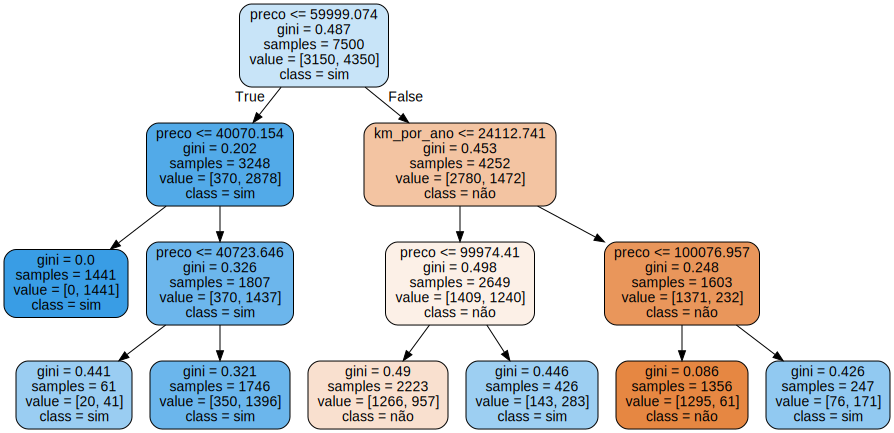

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = x.drop(columns=["idade_do_modelo", "km_por_ano"], axis=1)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

modeloKnn = KNeighborsClassifier()

modeloKnn.fit(treino_x, treino_y)
previsoes = modeloKnn.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia é de: ", acuracia)







A acuracia é de:  73.6


In [ ]:
# Arvore de decisão

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

uri_dataset_leo = "https://raw.githubusercontent.com/zadok8216/Dataset/main/testeCSV.csv"

dataset = pd.read_csv(uri_dataset_leo)

dataset.head()
a_renomear = {
    "yes": 1,
    "no" : 0

}

a_renomear_y = {
    "on" : 1,
    "off" : 0
}

#dataset.Presence = dataset.Presence.map(a_renomear)
#dataset.Decision = dataset.Decision.map(a_renomear_y)



x = dataset[["temperatura" , "humidade", "presenca","iluminacao"]] 
y = dataset["nivel"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)



modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

print("Resultado: ", previsao)

acuracia = accuracy_score(teste_y, previsao) * 100

print("Acuracia: ", acuracia)






Resultado:  [0 1 0 1 0]
Acuracia:  40.0


In [ ]:
# Naive-bayes gaussian

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as npy

uri_dataset_leo = "https://raw.githubusercontent.com/zadok8216/Dataset/main/ar_condicionado.txt"

dataset = pd.read_csv(uri_dataset_leo)

SEED = 5
npy.random.seed(SEED)

a_renomear = {
    "yes": 1,
    "no" : 0

}

a_renomear_y = {
    "on" : 1,
    "off" : 0
}

dataset.Presence = dataset.Presence.map(a_renomear)
dataset.Decision = dataset.Decision.map(a_renomear_y)



x = dataset[["Presence", "Temperature" , "Humidity", "Time"]] 
y = dataset["Decision"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)



modelo = GaussianNB()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

print("Resultado: ", previsao)

acuracia = accuracy_score(teste_y, previsao) * 100

print("Acuracia: ", acuracia)

Resultado:  [1 0 1 0]
Acuracia:  100.0


In [ ]:
# Naive-bayes Multinomial

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as npy

uri_dataset_leo = "https://raw.githubusercontent.com/zadok8216/Dataset/main/ar_condicionado.txt"

dataset = pd.read_csv(uri_dataset_leo)

SEED = 5
npy.random.seed(SEED)

a_renomear = {
    "yes": 1,
    "no" : 0

}

a_renomear_y = {
    "on" : 1,
    "off" : 0
}

dataset.Presence = dataset.Presence.map(a_renomear)
dataset.Decision = dataset.Decision.map(a_renomear_y)



x = dataset[["Presence", "Temperature" , "Humidity", "Time"]] 
y = dataset["Decision"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)



modelo = MultinomialNB()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

print("Resultado: ", previsao)

acuracia = accuracy_score(teste_y, previsao) * 100

print("Acuracia: ", acuracia)

Resultado:  [1 1 1 0]
Acuracia:  75.0


In [ ]:

# SVM

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as npy

uri_dataset_leo = "https://raw.githubusercontent.com/zadok8216/Dataset/main/ar_condicionado.txt"

dataset = pd.read_csv(uri_dataset_leo)

SEED = 5
npy.random.seed(SEED)

a_renomear = {
    "yes": 1,
    "no" : 0

}

a_renomear_y = {
    "on" : 1,
    "off" : 0
}

dataset.Presence = dataset.Presence.map(a_renomear)
dataset.Decision = dataset.Decision.map(a_renomear_y)



x = dataset[["Presence", "Temperature" , "Humidity", "Time"]] 
y = dataset["Decision"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)



modelo = svm.SVC()
modelo.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

print("Resultado: ", previsao)

acuracia = accuracy_score(teste_y, previsao) * 100

print("Acuracia: ", acuracia)

Resultado:  [1 1 1 1]
Acuracia:  50.0


In [ ]:

# Rede neural Perceptron

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as npy
import pandas as pd

uri_dataset_leo = "https://raw.githubusercontent.com/zadok8216/Dataset/main/ar_condicionado.txt"

dataset = pd.read_csv(uri_dataset_leo)

SEED = 5
npy.random.seed(SEED)

a_renomear = {
    "yes": 1,
    "no" : 0

}

a_renomear_y = {
    "on" : 1,
    "off" : 0
}

dataset.Presence = dataset.Presence.map(a_renomear)
dataset.Decision = dataset.Decision.map(a_renomear_y)



x = dataset[["Presence", "Temperature" , "Humidity", "Time"]] 
y = dataset["Decision"]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(treino_x, treino_y)

previsao = modelo.predict(teste_x)

print("Resultado: ", previsao)

acuracia = accuracy_score(teste_y, previsao) * 100

print("Acuracia: ", acuracia)

In [1]:
pip install -U micromlgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32172 sha256=d2939dcd793d7d6d8a1b331bceb5a56ca38e9590ae637e6488344929f45f1e06
  Stored in directory: /root/.cache/pip/wheels/6f/98/43/0860b692737af546b9262a8b60ec3690c8bdc51c25e545ae09
Successfully built micromlgen


       temperatura  humidade  horario  dia_da_semana
0               21        49      545              0
1               22        48      545              0
2               21        55      549              0
3               21        53      540              0
4               23        51      543              0
...            ...       ...      ...            ...
27995           20        50      548              6
27996           21        53      546              6
27997           22        49      540              6
27998           23        53      548              6
27999           22        55      547              6

[28000 rows x 4 columns]
0        1
1        1
2        1
3        1
4        1
        ..
27995    1
27996    1
27997    1
27998    1
27999    1
Name: nivel, Length: 28000, dtype: int64

Acuracia decision tree:  100.0
horario score: 88.377
dia_da_semana score: 11.623
temperatura score: 0.000
humidade score: 0.000


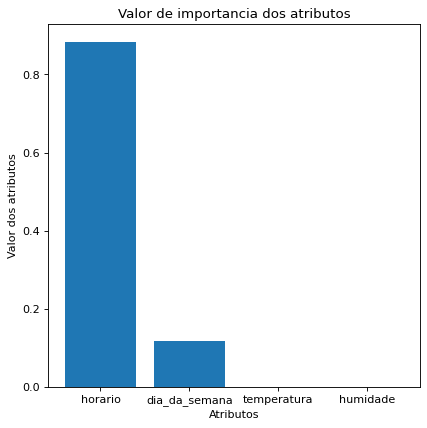


Acuracia random forest:  1.0

Acuracia svc:  1.0

Acuracia nb:  0.6797619047619048


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from  sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from micromlgen import port

## Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.## 

if __name__ == "__main__":

    SEED = 5
    np.random.seed(SEED)

    # dataset_url = "https://raw.githubusercontent.com/zadok8216/Dataset/main/dataset.csv"
    dataset_url = "https://raw.githubusercontent.com/zadok8216/Dataset/main/dataset_complete.csv"
    dataframe = pd.read_csv(dataset_url)

    # print(dataframe.head())

    # minutos = pd.DatetimeIndex(dataframe['horario'])
    # minutos = minutos.hour * 60 + minutos.minute
    # # print(minutos)
    # dataframe.insert(7,"minutos", minutos)
    # # print(dataframe.head())

    # # Formato "DD/MM/YY" = "YY-MM-DD"
    # data = pd.to_datetime(arg=dataframe['data'], errors="raise", dayfirst=True, yearfirst=False, format="%d/%m/%Y")
    # # print("Data = " + str(data))
    # # print(data.dt.dayofweek)

    # dataframe.insert(8,'dia_da_semana',data.dt.dayofweek)

    # dispositivos = {
    #     'Lampada' : 0,
    #     'Ar-Condicionado' : 1
    # }

    # dataframe['dispositivo'] = dataframe['dispositivo'].map(dispositivos)

    # print(dataframe.head())
    

    # atributos = ["temperatura", 'humidade', 'presenca', 'lux', 'minutos', 'dia_da_semana']
    atributos = ["temperatura", 'humidade', 'horario', 'dia_da_semana']
    
    X = dataframe[atributos]
    Y = dataframe.nivel
    print(X)
    print(Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Decision tree
    classificador = DecisionTreeClassifier()
    classificador = classificador.fit(X_train, Y_train)

    Y_pred = classificador.predict(X_test)
    print("\nAcuracia decision tree: ", (metrics.accuracy_score(Y_test, Y_pred))*100)

# plot arvore montada
    # tree.plot_tree(classificador)
    # tree_text = tree.export_text(classificador,feature_names=atributos)
    # print(tree_text)


#plot confusion matriz
    # cor = 'white'
    # matriz = plot_confusion_matrix(DecisionTreeClassifier, X_test, Y_test, cmap=plt.cm.Blues)
    # cm = confusion_matrix(Y_test, Y_pred)
    # print(cm)


    # matriz = ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
    # matriz.plot()

    

# plot importancia dos atributos

    features_importancia = pd.DataFrame(classificador.feature_importances_,
    index = atributos,
    columns=['importance']).sort_values('importance',
    ascending=False)

    num = min([50, len(atributos)])
    xlocs = np.arange(num)

    valores_para_plot = features_importancia.iloc[:num].values.ravel()
    labels_atributos = list(features_importancia.iloc[:num].index)

    for x,y in enumerate(labels_atributos):
      valor = valores_para_plot[x]
      print("%s score: %.3f" % (y,valor*100))

    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(xlocs, valores_para_plot, align = 'center')
    plt.title('Valor de importancia dos atributos')
    plt.ylabel("Valor dos atributos")
    plt.xlabel('Atributos')
    plt.xticks(xlocs, labels_atributos)
    plt.show()

# Random Forest
    randomForestCls = RandomForestClassifier()
    randomForestCls = randomForestCls.fit(X_train, Y_train)

    Y_pred = randomForestCls.predict(X_test)
    print("\nAcuracia random forest: ", metrics.accuracy_score(Y_test, Y_pred))


# SVC
    svcCls = SVC(gamma="auto")
    svcCls = svcCls.fit(X_train, Y_train)

    Y_pred = svcCls.predict(X_test)
    print("\nAcuracia svc: ", metrics.accuracy_score(Y_test, Y_pred))

# GaussianNB
    nbCls = GaussianNB()
    nbCls = nbCls.fit(X_train, Y_train)

    Y_pred = nbCls.predict(X_test)
    print("\nAcuracia nb: ", metrics.accuracy_score(Y_test, Y_pred))


    